<h1 align='center' style="background:darkblue"><pre>EDA    A to Z   </pre></h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [4]:
# doing the statistical summary

df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum() * 100 / len(df)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [11]:
df.notna().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [13]:
df.nunique() # checking all uniques values of the every column

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

<Axes: >

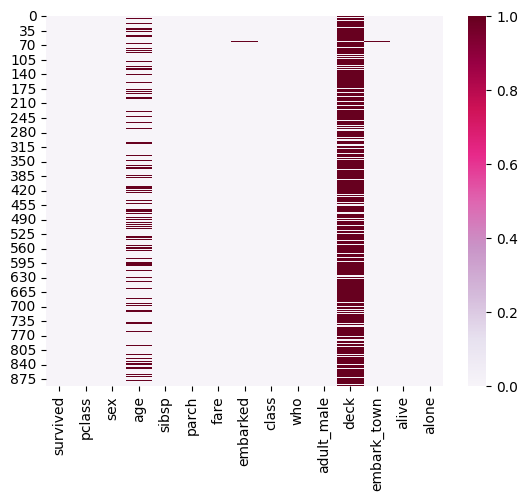

In [14]:
# analyzing the null value via heat map

sns.heatmap(df.isnull(), cmap='PuRd')

In [15]:
# we can see that the deck column have so much of the null values we have to drop it 
df.drop(columns={'deck'}, inplace=True)

In [16]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False


<Axes: xlabel='embark_town', ylabel='Count'>

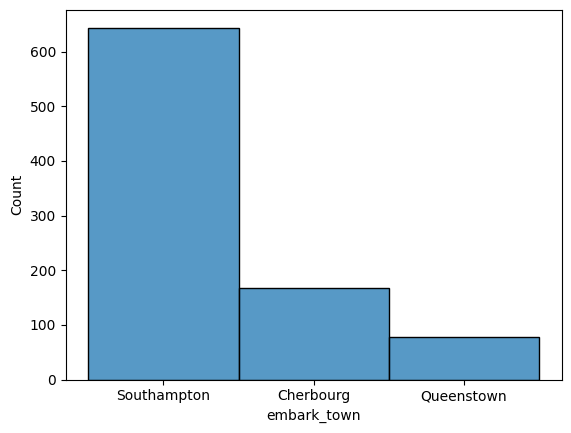

In [17]:
sns.histplot(df, x='embark_town' , bins=10)

<Axes: xlabel='embark_town', ylabel='fare'>

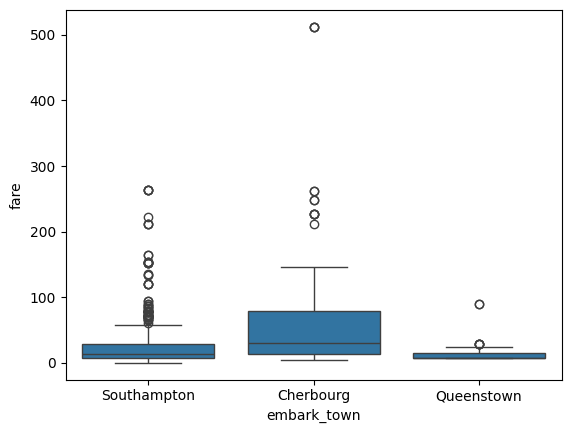

In [18]:
# creating a box plot
sns.boxplot(df, x='embark_town' , y='fare')

C:\Users\KHATTAK\AppData\Local\Temp\ipykernel_3280\3664968764.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['class','sex'])['survived'].mean().unstack().plot(kind='bar', stacked=True)


<Axes: xlabel='class'>

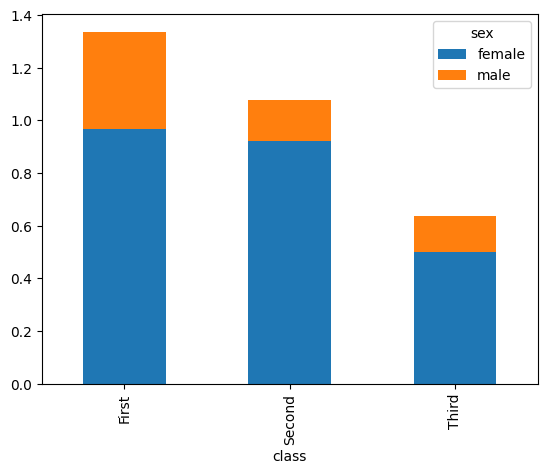

In [19]:
# stacked barchart

df.groupby(['class','sex'])['survived'].mean().unstack().plot(kind='bar', stacked=True)

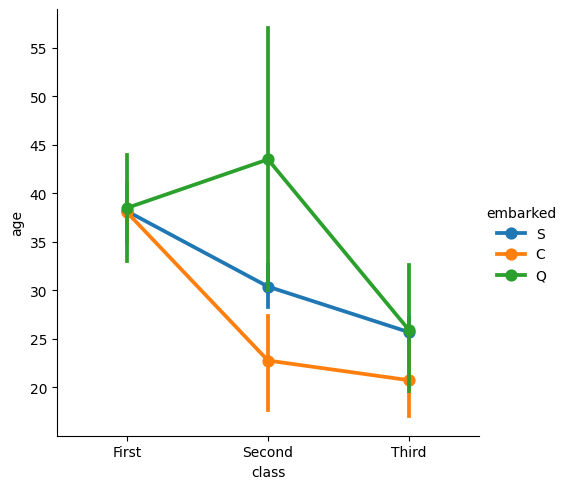

In [22]:
# making of catplot

sns.catplot(df, x='class', y='age', hue='embarked', kind='point')

(0.0, 550.0)

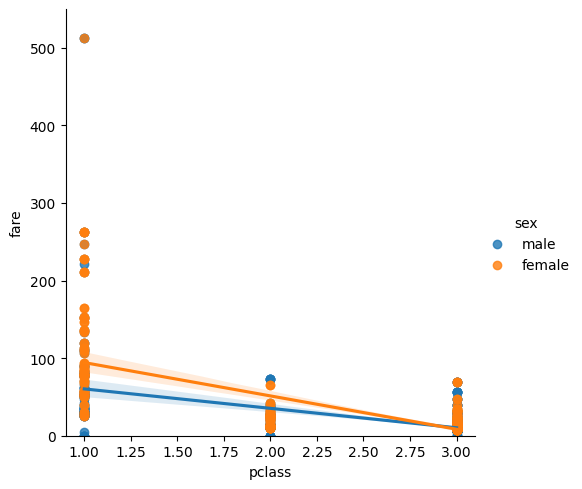

In [26]:
# creating LM plot 
# This plot is good for outliers detection

sns.lmplot(df, x='pclass', y='fare',hue='sex')
plt.ylim(0,550)

In [27]:
# creating a new column to analyze the age better 
df['agenew']= pd.cut(df['age'], bins=[0,10,18,30,50,80], labels=['kids','childerns','young','mature','old'])

In [28]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,agenew
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,mature
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,young


C:\Users\KHATTAK\AppData\Local\Temp\ipykernel_3280\50570013.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('agenew')['survived'].mean().plot(kind='bar')


<Axes: xlabel='agenew'>

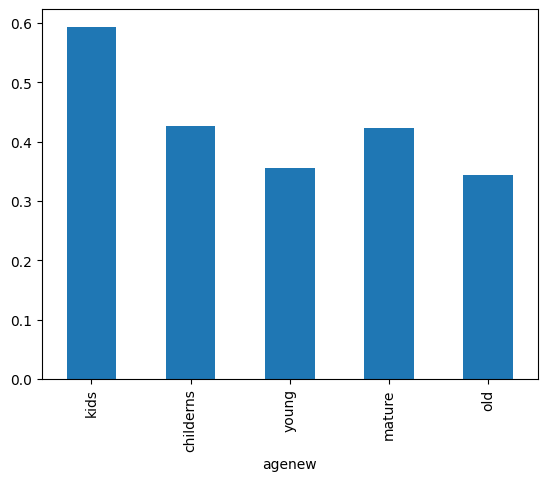

In [29]:
df.groupby('agenew')['survived'].mean().plot(kind='bar')

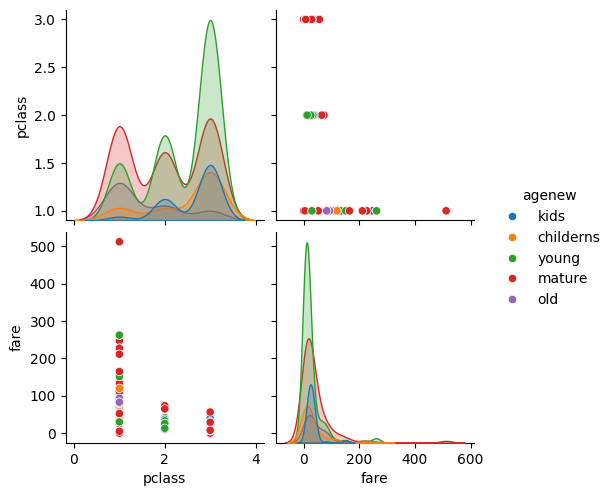

In [30]:
# creating a pairplot with vars
sns.pairplot(df, hue='agenew', vars=['pclass', 'fare'])